# Collatz Problem

## Define 'collatz_one_step' function

In [1]:
def collatz_one_step(num):
    if num == 1:
        rst = 1
    elif is_odd(num):
        rst = 3*num + 1
    else:
        rst = num/2
    return (num,rst)

# A graph displaying the collatz connection of integers

## Generate the graph

In [2]:
G = DiGraph() # graphs.EmptyGraph() 

n = 8
G.add_edges([(2^(k+1),2^k,'2^k') for k in range(0, n)])
G.set_vertices(dict([(2^k,k) for k in range(0, n+1)])) # On each vertex, we assign the distance of it from 1.

N = 50
for v in range(3, N+1):
    chain = []
    w = v
    while ((w not in G.vertices()) or G.get_vertex(w) == None) and (len(G.vertices()) < N*10):
        chain.append(w)
        edge = collatz_one_step(w)
        label = 'even' if edge[0] == edge[1]*2 else 'odd'
        G.add_edge(edge[0], edge[1], label)
        w = edge[1]
    else:
        chain.append(w)
    chain.reverse()
    base = G.get_vertex(chain[0])
    distance_dict = dict(zip(chain[1:len(chain)],[k + base for k in range(1,len(chain))]))
    G.set_vertices(distance_dict) 

## Plot the graph

In [18]:
M = max(G.get_vertices().values()); R = max(30,M)

elabels = list(set(G.edge_labels())); elabels
edge_subsets = dict([(label, [e for e in G.edges() if e[2] == label]) for label in elabels]); edge_subsets
ecols = dict(
    maroon = edge_subsets['2^k'], 
    orangered = edge_subsets['even'], 
    olivedrab = edge_subsets['odd'])

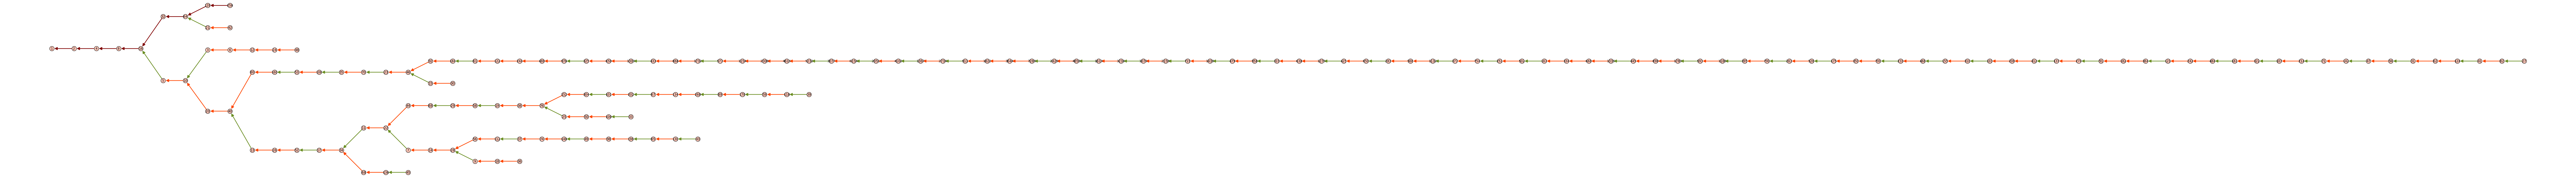

In [19]:
G.graphplot(
#     vertex_size=100,
    edge_colors = ecols, # color_by_label=True,
    layout='tree', tree_root=1, tree_orientation='right' #'up'
).show(figsize=[R,R/8]) #, layout = 'tree')

## Contract edges labeled 'even'

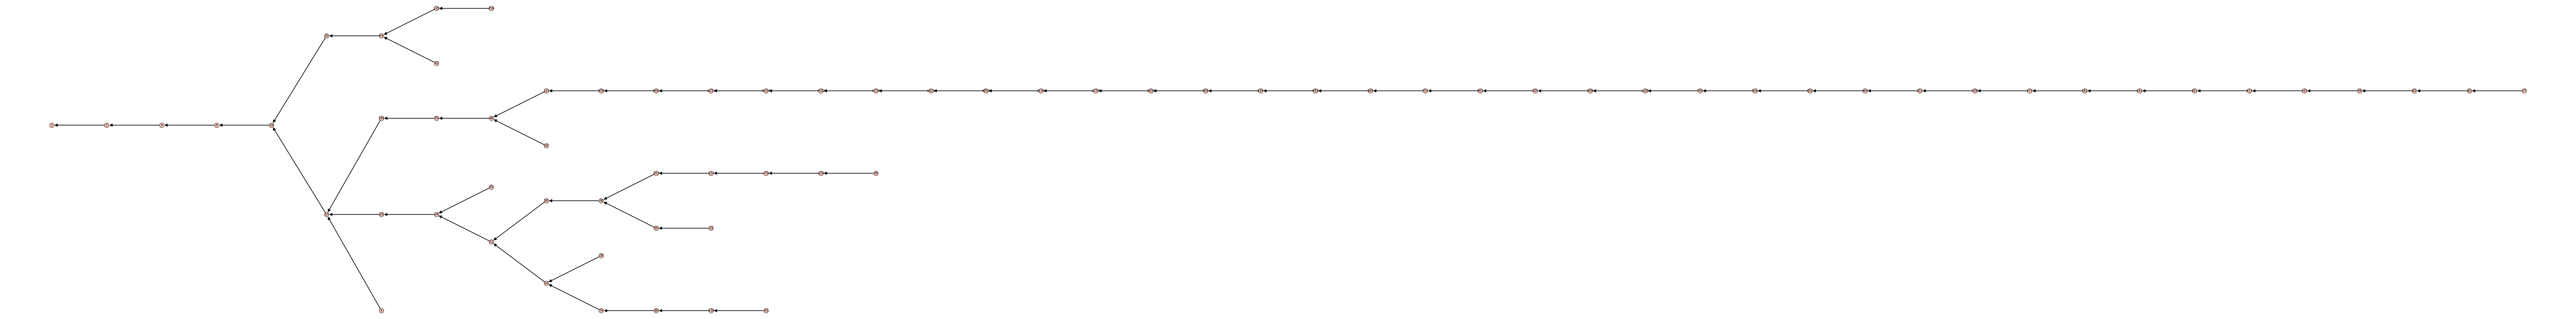

In [53]:
GG = G.copy()
GG.contract_edges(edge_subsets['even']); #GG.edges()

elabels = list(set(GG.edge_labels())); # print elabels
edge_subsets = [[e for e in GG.edges() if e[2] == label] for label in elabels]
ecols = dict(orangered=edge_subsets[0], olivedrab=edge_subsets[1]); #print ecols

GG.graphplot(
#     vertex_size=100,
#    edge_colors = ecols, # color_by_label=True,
    layout='tree', tree_root=1, tree_orientation='right' #'up'
).show(figsize=[R,R/8]) #, layout = 'tree')

# Distribution of distances of integers from '1'

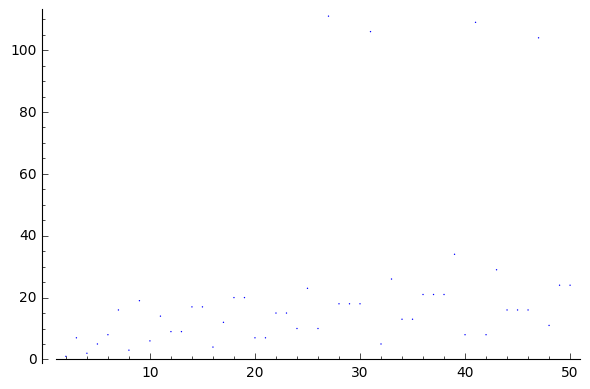

In [57]:
list_plot([(k, G.get_vertex(k)) for k in range(2, N+1) if G.get_vertex(k) != None], pointsize = 1)
# list_plot([(k, GG.get_vertex(k)) for k in range(2, N+1) if GG.get_vertex(k) != None], pointsize = 1)